In [1]:
#Exploration of New product - September 2021
#Section with PCs and with Levels
import datetime as dt 
import glob
import netCDF4 as nc
import numpy as np
import os

import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import cmocean
import time
import gsw

import yaml


import numpy as np
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt


In [2]:
with open(r'configuration.yaml') as file:
    configuration = yaml.load(file, Loader=yaml.FullLoader)

    print("File version: ", configuration["version"])

File version:  0.1


## Glorys12

In [ ]:
%%time

dir_path = '/home/ref-ocean-reanalysis/global-reanalysis-phy-001-030-daily'
file = []

yy = "1993"
mm = ["01","02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"];

for yy in range(1993, 2013):
    
    start_time = time.time()

    for mms in mm:
        file = glob.glob(f"{dir_path}/{yy}/{mms}/*_mean_{yy}*.nc")
    
        for files in file:
            day = str(files[106: 108])

            ds_full = xr.open_mfdataset(files)

            glorys_sel = ds_full.sel(longitude=(-18.875), latitude=(69.12), method='nearest')
            #glorys_sel = ds_full.sel(depth=ds_full['depth'][0])
            # glorys_sel = glorys_sel.sel(dict(longitude=cora_sel['LONGITUDE'], latitude=cora_sel['LATITUDE'], time=cora_sel['TIME']), method='nearest')
            glorys_sel.to_netcdf(f'/home1/datahome/mlejeune/assets/Glorys_sel/GLORYS_{yy}{mms}{day}.nc')
    
        print(f"year {yy} {mms} finished in {time.time() - start_time}")


### Armor 3D

In [4]:
for yy in range(1993, 2013):
    ds_armor3d = xr.open_mfdataset(f"/home/ref-cmems-public/tac/multiobs/MULTIOBS_GLO_PHY_REP_015-002/ARMOR3D/data/{yy}/*.nc")
    ds_armor3d.sortby('time')
    ds_armor3d = ds_armor3d.sel(depth=ds_armor3d['depth'][0])
                             
    ds_armor3d.to_netcdf(f'/home/datawork-lops-bluecloud/osnet/data_out/bootstrap/OsNet_test_Nordic_Sea/armor3d_test/{yy}/ARMOR3D_{yy}.nc')
                             
    print(f"year {yy} finished")

ds_Armor3D_selected = xr.open_mfdataset(f"/home/datawork-lops-bluecloud/osnet/data_out/bootstrap/OsNet_test_Nordic_Sea/armor3d_test/*/*.nc")

ds_Armor3D_selected_lon = ds_Armor3D_selected.assign_coords(lon180=(((ds_Armor3D_selected.longitude + 180) % 360) - 180))  
ds_Armor3D_selected_lon['longitude'] = ds_Armor3D_selected_lon.lon180

ds_Armor3D_selected_lon = ds_Armor3D_selected_lon.sortby('longitude')


ds_Armor3D_selected_lon_spot = ds_Armor3D_selected_lon.sel(longitude=(-18.875), latitude=(69.12), method='nearest')
                    
ds_Armor3D_selected_lon_spot.to_netcdf(f'/home1/datahome/mlejeune/assets/GLORYS_interp/ARMOR3D_final.nc')

print("done")

year 2018 finished


### Plot Global Eolution

In [6]:
ds_selection_glorys = ty.sel(longitude=(-18.875), latitude=(69.12), method='nearest')

ds_full_prediteced = ds_full.sel(DEPTH=0)
ds_glorys_surface = ds_selection_glorys.sel(depth=ds_selection_glorys['depth'][0])

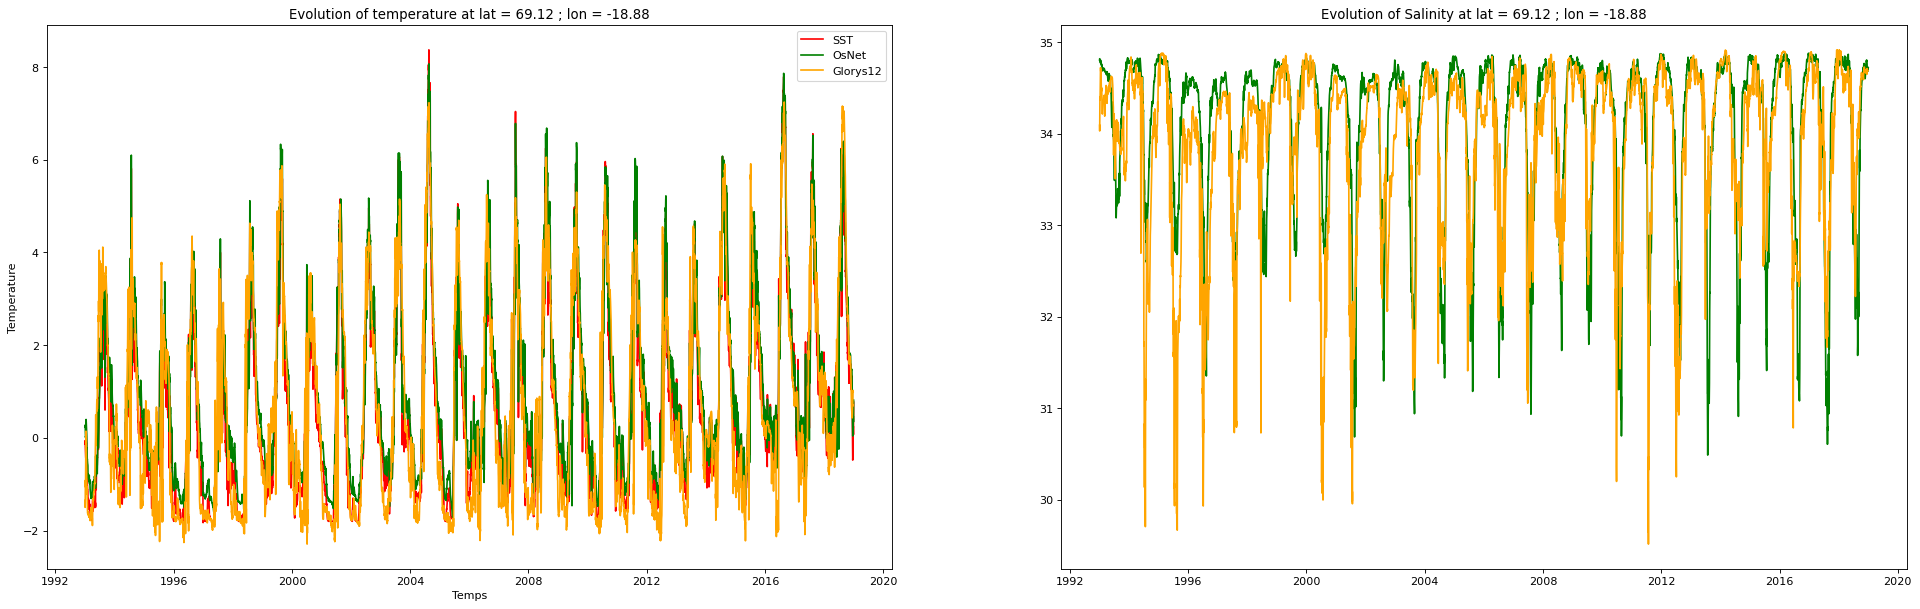

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(30,9), dpi=80, facecolor='w', edgecolor='k')

ax[0].set_title("Evolution of temperature at lat = 69.12 ; lon = -18.88")
ax[0].plot(ds_full['time'], ds_full['SST'], label='SST',c = 'red')
ax[0].plot(ds_full_prediteced['time'], ds_full_prediteced['TEMP_predicted'], label='OsNet',c = 'green')
ax[0].plot(ds_glorys_surface['time'], ds_glorys_surface['thetao'], label='Glorys12',c = 'orange')

ax[1].set_title("Evolution of Salinity at lat = 69.12 ; lon = -18.88")
ax[1].plot(ds_full_prediteced['time'], ds_full_prediteced['PSAL_predicted'], label='OsNet',c = 'green')
ax[1].plot(ds_glorys_surface['time'], ds_glorys_surface['so'], label='Glorys12',c = 'orange')

plt.setp(ax[0], xlabel='Temps')
plt.setp(ax[0], ylabel='Temperature')

leg = ax[0].legend();

plt.show()

## Plot moyenne 

In [3]:
#Create mount file for Glorys12

start_year = 1993;
end_year = 2012;
mm = ["01","02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"];

for yy in np.arange(start_year, (end_year + 1)):
    for mms in mm: 
        ds_to_mounths_glorys = xr.open_mfdataset(f"/home1/datahome/mlejeune/assets/Glorys_sel/GLORYS_{yy}{mms}*.nc")
        ds_to_mounths_glorys.to_netcdf(f'/home1/datahome/mlejeune/assets/Glorys_sel/mounths/produit_{mms}_{yy}.nc')



In [3]:
#Glorys12

ds_full = xr.open_mfdataset(f"/home1/datahome/mlejeune/assets/Glorys_sel/mounths/produit*.nc")
ds_full.sortby('time')
ds_full = ds_full.sel(depth=ds_full['depth'][0])
ds_full

<xarray.Dataset>
Dimensions:    (time: 7305)
Coordinates:
    longitude  float32 -18.83
    latitude   float32 69.08
    depth      float32 0.494
  * time       (time) datetime64[ns] 1993-01-01T12:00:00 ... 2012-12-31T12:00:00
Data variables:
    mlotst     (time) float32 dask.array<chunksize=(31,), meta=np.ndarray>
    zos        (time) float32 dask.array<chunksize=(31,), meta=np.ndarray>
    bottomT    (time) float32 dask.array<chunksize=(31,), meta=np.ndarray>
    sithick    (time) float32 dask.array<chunksize=(31,), meta=np.ndarray>
    siconc     (time) float32 dask.array<chunksize=(31,), meta=np.ndarray>
    usi        (time) float32 dask.array<chunksize=(31,), meta=np.ndarray>
    vsi        (time) float32 dask.array<chunksize=(31,), meta=np.ndarray>
    thetao     (time) float32 dask.array<chunksize=(31,), meta=np.ndarray>
    so         (time) float32 dask.array<chunksize=(31,), meta=np.ndarray>
    uo         (time) float32 dask.array<chunksize=(31,), meta=np.ndarray>
    vo         (time) float32 dask.array<chunksize=(31,), meta=np.ndarray>
Attributes: (12/24)
    title:              daily mean fields from Global Ocean Physics Analysis ...
    easting:            longitude
    northing:           latitude
    history:            2017/04/06 14:05:19 MERCATOR OCEAN Netcdf creation
    source:             MERCATOR GLORYS12V1
    institution:        MERCATOR OCEAN
    ...                 ...
    longitude_min:      -180.0
    longitude_max:      179.91667
    latitude_min:       -80.0
    latitude_max:       90.0
    z_min:              0.494025
    z_max:              5727.917

In [13]:
# Armor 3D
ds_full = ds_Armor3D_selected_lon_area_clean 

In [15]:
#SST & OsNet

ds_full = xr.open_mfdataset(f"/home1/datahome/mlejeune/assets/test/produit*.nc")
ds_full.sortby('time')
ds_full = ds_full.sel(DEPTH=0)


In [16]:
start_year = 1993;
end_year = 2002;

current_year = start_year;

global_array = []

for yy in np.arange(start_year, (end_year + 1)):
    current_year = current_year + 1;
    
    tempo_array = []
    tempo_array_osnet = []
    
    
    ds_full_year = ds_full.where(ds_full.time.dt.year>=current_year , drop = True)
    ds_full_year = ds_full.where(ds_full.time.dt.year==yy , drop = True)
    
    ds_full_year.sortby('time')

    #Data from SST
    data = ds_full_year['SST']
    
    #Data from OsNet
    #data = ds_full_year['TEMP_predicted']
    
    #Data from Glorys12
    #data = ds_full_year['thetao']
    
    
    for tt in range(len(data)):
        datatempo_selec = data.compute()[tt]
        tempo_array.append(datatempo_selec.item())
    
    global_array.append(tempo_array)
    
print(len(global_array))

10


In [17]:
#Calcul average of each year
average_year = []

for years in range(len(global_array)):
    data_without_nan = [x for x in global_array[years] if math.isnan(x) == False]
    value = sum(data_without_nan) / len(data_without_nan)
    average_year.append(value);

print(average_year)

[0.20172645882384418, 0.5276283482142857, -0.10046612465218321, -0.18554620794911203, -0.551423122458262, 0.11296052279537672, 0.8089585395708476, 0.11491852640454235, 0.08123520106485445, 0.5307676550460189]


In [18]:
tempo_list_sum = []

#init tempo list
for datas_init in range(len(global_array[0])):
    tempoo = []
    value = global_array[0][datas_init] + average_year[0]
    
    tempoo.append(value)
    
    tempo_list_sum.append(tempoo)
   
global_array.pop(0)

print(len(global_array[0]))


365


In [19]:
for yy in range(len(global_array)):
    for datas in range(365): #len(global_array[yy])
        value = global_array[yy][datas] + average_year[yy]
        tempo_list_sum[datas].append(global_array[yy][datas])

In [20]:
final_list = []

for yy in range(len(tempo_list_sum)):
    data_current = []
    data_current = [x for x in tempo_list_sum[yy] if math.isnan(x) == False]
    
    moyenne = 0
    summ = 0
    
    summ = sum(data_current)        
    moyenne = summ / len(data_current)
    
    final_list.append(moyenne)


In [30]:
final_list_osNet = final_list

In [9]:
final_list_glorys12 = final_list

In [21]:
final_list_SST = final_list

In [19]:
final_list_Armor3D = final_list
tempo_list_final = []
for uu in range(len(final_list_Armor3D)):
    value = final_list_Armor3D[uu]
    for i in range(7):
        tempo_list_final.append(value)
        
print(len(tempo_list_final))

def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth


364


### Salinity

In [61]:
final_list_OsNet_Salinity = final_list

In [55]:
final_list_Glorys12_Salinity = final_list

In [39]:
final_list_Armor3D_Salinity = final_list

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


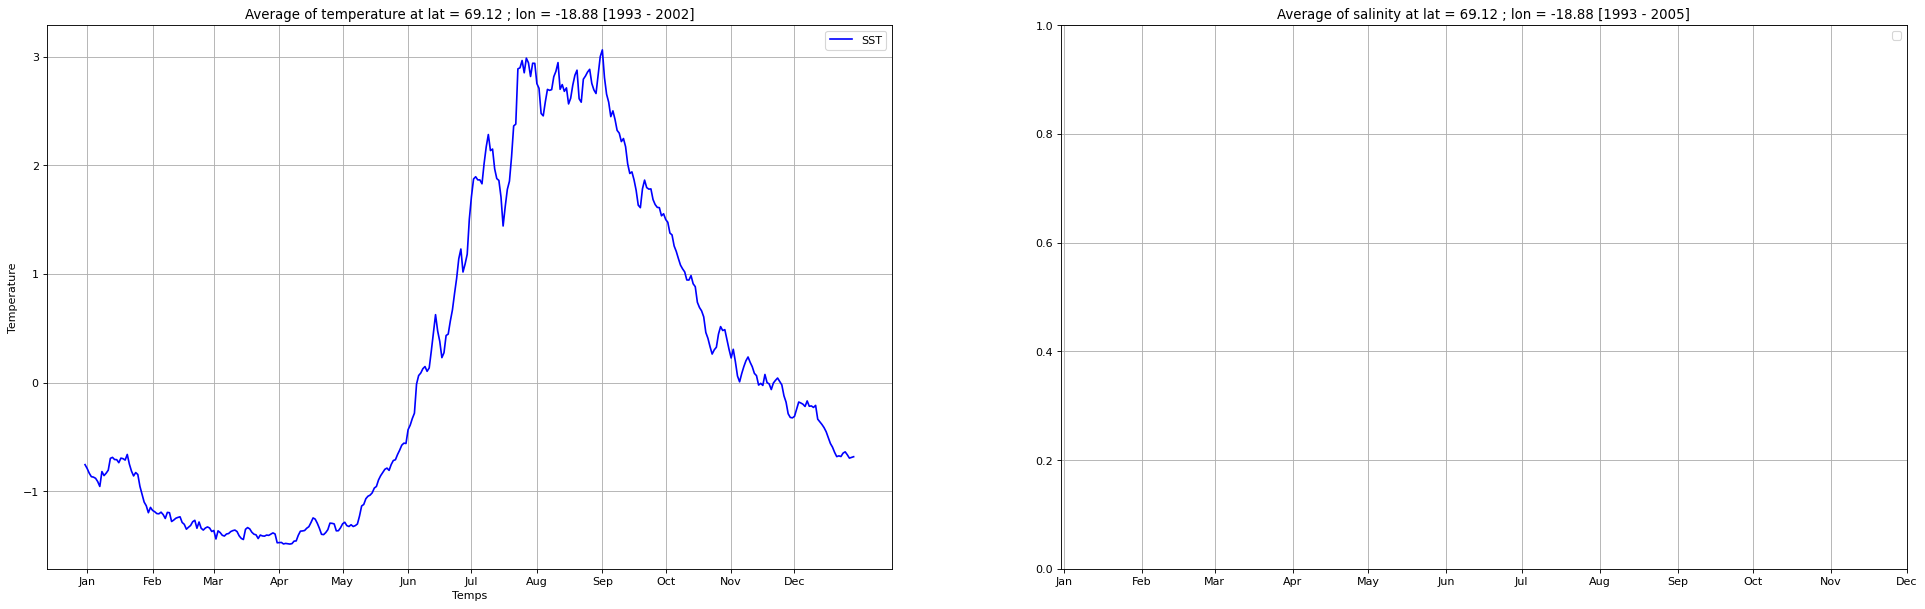

In [22]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(30,9), dpi=80, facecolor='w', edgecolor='k')

ax[0].set_title("Average of temperature at lat = 69.12 ; lon = -18.88 [1993 - 2002]")
#ax[0].plot(np.arange(365), final_list_osNet, label='OsNet',c = 'red')
ax[0].plot(np.arange(365), final_list_SST, label='SST',c = 'blue')
#ax[0].plot(np.arange(365), final_list_glorys12, label='Glorys12',c = 'orange')
#ax[0].plot(np.arange(364), tempo_list_final, label='Armor3D',c = 'green')
#ax[0].plot(np.arange(364), smooth(tempo_list_final,19), label='Armor3D',c = 'black')

ax[1].set_title("Average of salinity at lat = 69.12 ; lon = -18.88 [1993 - 2005]")
#ax[1].plot(np.arange(365), final_list_OsNet_Salinity, label='OsNet',c = 'red')
#ax[1].plot(np.arange(365), final_list_Glorys12_Salinity, label='Glorys12',c = 'orange')
#ax[1].plot(np.arange(365), final_list_Armor3D_Salinity, label='Glorys12',c = 'orange')

plt.setp(ax[0], xlabel='Temps')
plt.setp(ax[0], ylabel='Temperature')

month_starts = [1,32,61,92,122,153,183,214,245,275,306,336]
month_names = ['Jan','Feb','Mar','Apr','May','Jun',
               'Jul','Aug','Sep','Oct','Nov','Dec'] 

ax[0].set_xticks(month_starts)
ax[0].set_xticklabels(month_names)

ax[1].set_xticks(month_starts)
ax[1].set_xticklabels(month_names)

leg = ax[0].legend();
leg = ax[1].legend();

ax[0].grid() 
ax[1].grid()
plt.show()